# Predicting Banglore House prices


### Main Idea


####  -  What are the things that a potential home buyer considers before purchasing a house?
#### - The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence?
#### -  What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank. For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan.
According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.
Modelling is done to adress the questions mentioned!

#### Features
- Area_type – describes the area
- Availability – when it can be possessed or when it is ready(categorical and time-series)
- Location – where it is located in Bengaluru
- Price – Value of the property in lakhs(INR)
- Size – in BHK or Bedroom (1-10 or more)
- Society – to which society it belongs
- Total_sqft – size of the property in sq.ft
- Bath – No. of bathrooms
- Balcony – No. of the balcony

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Bengaluru_House_Data.csv')

In [2]:
#understanding the number of features and thier type for the analysis

data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Exploratory Data Analysis

In [3]:
#finding number of unique area_types available
data.shape

(13320, 9)

In [4]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

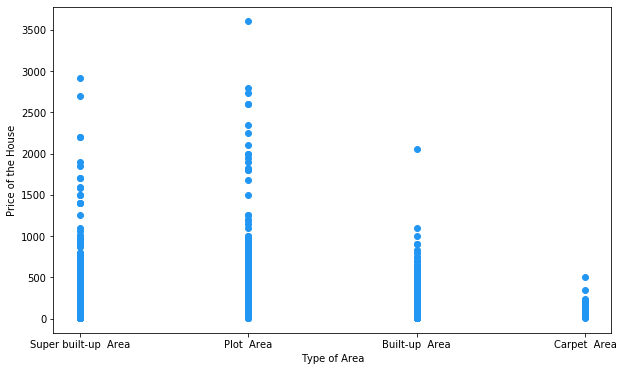

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['area_type'],data['price'], color='#2196f3')
plt.xlabel('Type of Area')
plt.ylabel('Price of the House')
plt.show()

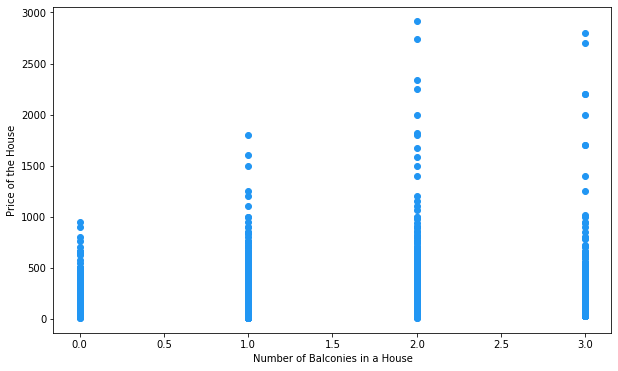

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['balcony'],data['price'], color='#2196f3')
plt.xlabel('Number of Balconies in a House')
plt.ylabel('Price of the House')
plt.show()

## The graph below indicates that there no major correlation between number of balconies 
# and price of the house. Hence, this features can be dropped from the model.

In [7]:
data['balcony'].corr(data['price'])

#the correlation betweem balcony and price is 0.12 which indicates a very weak relationship.

0.120355309380677

##### Convert the categorical values in the column 'area_type' into numerical data.

There are 4 unique categories. So, replace them with numericals (0-4).

In [8]:
data.society.isnull().sum()

# number of null values of society seem quite high and the feature 
# doesnot seem to have a very high correlation with price.
# Hence removing it would be a better option for analysis

5502

In [9]:
# Removing the the features 'balcony','availability','society

data2 = data.drop(['area_type', 'society', 'balcony', 'availability'], axis = 1)


## There are only 73 null instances in bath feature and 16 null instances in size features out of 13000+ intances. 
##Hence removing them completely would be a better option.

In [10]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
data3 = data2.dropna()
data3.shape

(13246, 5)

In [12]:
data3
# not much change has occured

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [13]:
# Preprocess the column 'size'

#finding number of unique values in size
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))

/Users/Aneesh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


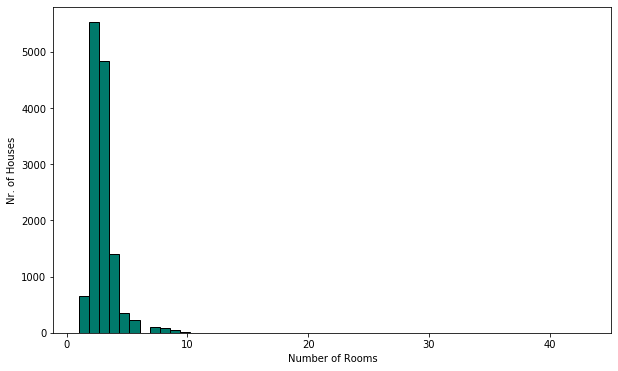

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(data3['bhk'], ec='black', bins = 50, color='#00796b')
plt.xlabel('Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [16]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
data3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [18]:
data3[data3.bhk>11] # Finding n of houses in listing having 11 bedrooms

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
9935,1Hoysalanagar,13 BHK,5425,13.0,275.0,13
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [19]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
# Preprocessing the column 'total_sqft'

#Creating a function to differentiate float values

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
is_float(9.8)

True

In [22]:

## removing total_sqft which are not float values

data3[~data3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [23]:
##Creating a function to convert values of 'total_sqft' from sqft to num

def convert_sqft_to_num(x):
    tokens = x.split(' - ')
    if len(tokens) == 2:
        return((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [24]:
convert_sqft_to_num('apple')

In [25]:
data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(convert_sqft_to_num)


In [26]:
data4.loc[165] # Verifying the data for conversion of sqft to num

location      Sarjapur
size             2 BHK
total_sqft      1242.5
bath                 2
price            43.49
bhk                  2
Name: 165, dtype: object

In [27]:
data5 = data4.copy() # Making a new data frame data copy of data 4

In [28]:
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']

data5['price_per_sqft'].describe().apply(lambda x: format(x, 'f'))

count       13200.000000
mean         7920.759150
std        106727.155209
min           267.829813
25%          4267.701345
50%          5438.331478
75%          7317.073171
max      12000000.000000
Name: price_per_sqft, dtype: object

In [29]:
len(data5.location.unique())

1304

In [30]:
data5.location = data5.location.apply(lambda x:x.strip())

location_stats = data5.groupby('location')['location'].agg('count').sort_values(ascending = False)

location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [31]:
location_stats[location_stats<=10]

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [32]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [33]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [34]:
data5 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [35]:

## removing the instances which has (area per room) room less than 300
data5[(data5.total_sqft/data5.bhk)<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [36]:
# Creating data6 data frame which has houses of avg 300sqft/bedroom only
data6 = data5[~((data5.total_sqft/data5.bhk)<300)] 
data6.shape

(12502, 7)

In [37]:
data6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

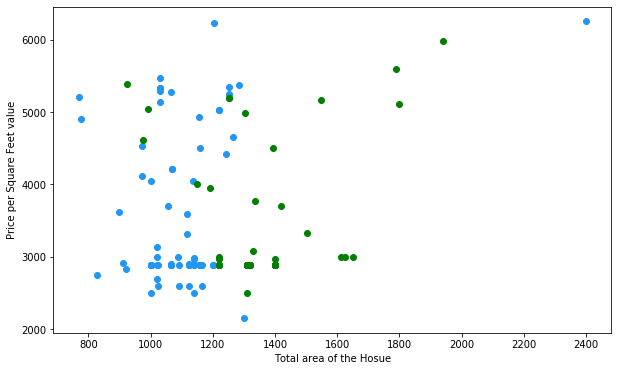

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data6.total_sqft[(data6['bhk']==2) & (data6['location'] == 'Electronic City Phase II')],
            data6.price_per_sqft[(data6['bhk']==2) & (data6['location'] == 'Electronic City Phase II')], color='#2196f3')
plt.scatter(data6.total_sqft[(data6['bhk']==3) & (data6['location'] == 'Electronic City Phase II')],
            data6.price_per_sqft[(data6['bhk']==3) & (data6['location'] == 'Electronic City Phase II')], color='green')
plt.xlabel('Total area of the Hosue')
plt.ylabel('Price per Square Feet value')
plt.show()

# Plotting number of 2 BHK and 3 BHK houses!

In [39]:
# Standard deviation of price persqft
data6.price_per_sqft.std() 

4168.127338507359

In [40]:
data7 = data6.copy()

In [41]:
# taking the listings those are having only in between mean + std and mean - std 

data8 = data7[(data7.price_per_sqft <= (data6.price_per_sqft.mean()+data6.price_per_sqft.std()))& 
              (data7.price_per_sqft > (data6.price_per_sqft.mean()-data6.price_per_sqft.std()))]

In [42]:
data8.shape

(11294, 7)

In [43]:
data9 = data8.copy()

data9.location[1]

'Chikka Tirupathi'

In [44]:
# Taking dataframe which has only ideal cases of bathrooms equal to or less than bhk+1
# This is because few listings has huge number of bathrooms for a practically lesser number of bedrooms
# Which isnt ideal case
data10 = data9[~(data9.bath > data9.bhk+2)]

In [45]:
data10.shape

(11290, 7)

In [46]:
# Verifying which houses has abnormalities in count of bhk and bathrooms

data9[(data9.bath >= data9.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
84,EPIP Zone,3 BHK,1499.0,5.0,102.0,3,6804.536358
337,Thigalarapalya,4 BHK,3122.0,6.0,230.0,4,7367.072389
490,Old Madras Road,5 BHK,4500.0,7.0,337.0,5,7488.888889
524,Jakkur,4 BHK,5230.0,6.0,465.0,4,8891.013384
550,Hebbal,3 BHK,3450.0,5.0,260.0,3,7536.231884
...,...,...,...,...,...,...,...
12366,other,3 Bedroom,5656.0,5.0,499.0,3,8822.489392
12544,Hebbal,4 BHK,4225.0,6.0,359.0,4,8497.041420
13095,other,4 BHK,6652.0,6.0,660.0,4,9921.828022
13119,other,4 Bedroom,6688.0,6.0,700.0,4,10466.507177


                   location  total_sqft  bath   price  bhk
0  Electronic City Phase II      1056.0   2.0   39.07    2
1          Chikka Tirupathi      2600.0   5.0  120.00    4
2               Uttarahalli      1440.0   2.0   62.00    3
3        Lingadheeranahalli      1521.0   3.0   95.00    3
4                  Kothanur      1200.0   2.0   51.00    2


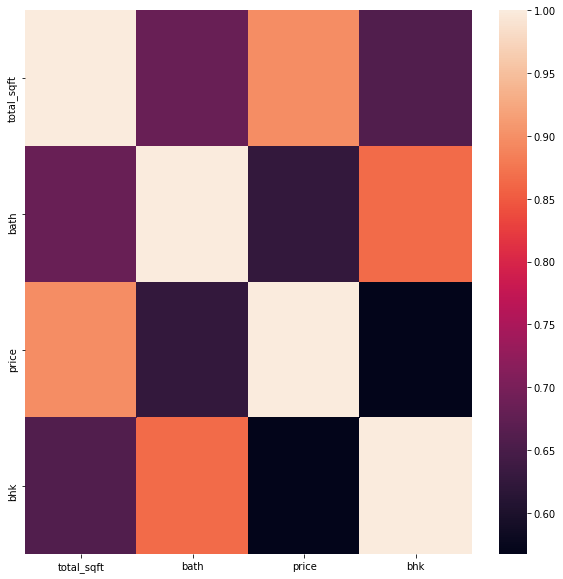

In [47]:
# for the modelling purposes we do not need the  size, price_per_sqft whoch doesnt affect teh model.
# Hence we are dropping these columns

data10 = data9.drop(['size', 'price_per_sqft'], axis = 'columns')
print(data10.head())

plt.figure(figsize = [10,10])
sns.heatmap(data10.corr())

In [48]:
# Adding dummies to the dataframe as the machine understands number better and clearly.

dummies = pd.get_dummies(data10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# creating new dataframe by dropping unnecessary columns
data11 = pd.concat([data10.drop('location', axis = 'columns'), 
                    dummies.drop('other', axis = 'columns')], axis = 'columns')

data11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,112.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,3453.0,4.0,231.00,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,1141.0,2.0,60.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,488.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
features = data11.drop(['price'], axis='columns')
y = data11.price

In [51]:
features.shape

(11294, 243)

In [52]:
features.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

### Modelling the data

In [53]:
# Splitting x,y values using sklearn - train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,y, test_size=1/10, random_state = 100)

In [54]:
# Implementing LInear regression

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# Predicting y values from the fit

y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)

In [56]:
from sklearn.metrics import r2_score

In [68]:
from sklearn.metrics import mean_absolute_error

print('R2- Value for train data:', r2_score(y_train, y_pred_train)) # r2 Score of trained data
print('R2- Value for test data:',r2_score(y_test, y_pred_test)) # r2 score of test data
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred_test))



R2- Value for train data: 0.8422188183472147
R2- Value for test data: 0.8369149129542437
Mean Absolute Error: 16.89684767298133


In [58]:
# Defining a price prediction function


def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(features.columns==location)[0][0]

    X = np.zeros(len(features.columns))
    X[0] = sqft
    
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return print( 'Price Predicted for',location,sqft,'sqft',bath,'bathrooms',bhk,'BHK is: ', linreg.predict([X])[0])

In [59]:
predict_price('Indira Nagar',1600, 4, 4)

Price Predicted for Indira Nagar 1600 sqft 4 bathrooms 4 BHK is:  131.1177574471597


In [60]:
predict_price('Rajaji Nagar',1300, bhk = 4, bath = 3)

Price Predicted for Rajaji Nagar 1300 sqft 3 bathrooms 4 BHK is:  110.77528434539464
